In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing

## Predspracovanie datasetov

Na predspracovanie oboch datasetov bolo nutné premiestniť všetky potrebné funkcie a triedy, vytvorené v predchádzajúcej
fáze projektu do novovytvoreného súboru preprocessing.py. V danom súbore sme vytvorili funkciu, ktorá ako argument berie
.csv súbory pre osobné a aj medicínske dáta, spojí ich do jedného datasetu, ktorý následne upraví pomocou našej
pipeline. Po predspracovaní nám vráti upravený dataset, s ktorým už môžeme ďalej pracovať. Túto funkciu zavoláme pre
trénovací, ako aj validačný dataset.

Ako môžeme nižšie vidieť, proces predspracovania prebehol správne, oba datasety obsahujú rovnaké atribúty, majú všade
len jeden dátový typ a sú bez akýchkoľvek chýbajúcich hodnôt.

In [2]:
medical_train = pd.read_csv("dataset/other_train.csv")
personal_train = pd.read_csv("dataset/personal_train.csv")

train_data = preprocessing.preprocess_dataset(medical_train, personal_train)
train_data.info()

d:\dokumenty\stu - fiit\5. sem\iau\projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3924 entries, 0 to 3923
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3924 non-null   float64
 1   sex                3924 non-null   float64
 2   kurtosis_oxygen    3924 non-null   float64
 3   pregnant           3924 non-null   float64
 4   education-num      3924 non-null   float64
 5   skewness_glucose   3924 non-null   float64
 6   mean_glucose       3924 non-null   float64
 7   std_oxygen         3924 non-null   float64
 8   capital-gain       3924 non-null   float64
 9   skewness_oxygen    3924 non-null   float64
 10  kurtosis_glucose   3924 non-null   float64
 11  final_weight       3924 non-null   float64
 12  diabetes_presence  3924 non-null   fl

In [3]:
medical_valid = pd.read_csv("dataset/other_valid.csv")
personal_valid = pd.read_csv("dataset/personal_valid.csv")

valid_data = preprocessing.preprocess_dataset(medical_valid, personal_valid)
valid_data.info()

Median stlpca education-num 10.0
Median stlpca capital-gain 0.0
Median stlpca age 52.0
Median stlpca pregnant 0.0
Median stlpca hours-per-week 40.0
Median stlpca capital-loss 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1306 non-null   float64
 1   sex                1306 non-null   float64
 2   kurtosis_oxygen    1306 non-null   float64
 3   pregnant           1306 non-null   float64
 4   education-num      1306 non-null   float64
 5   skewness_glucose   1306 non-null   float64
 6   mean_glucose       1306 non-null   float64
 7   std_oxygen         1306 non-null   float64
 8   capital-gain       1306 non-null   float64
 9   skewness_oxygen    1306 non-null   float64
 10  kurtosis_glucose   1306 non-null   float64
 11  final_weight       1306 non-null   float64
 12  diabetes_presence  1306 non-null   fl

d:\dokumenty\stu - fiit\5. sem\iau\projekt\venv\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["pregnant"] = X["pregnant"].map(format_pregnancy)
D:\Dokumenty\STU - FIIT\5. sem\IAU\projekt\preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

## Manuálne vytvorenie a vyhodnotenie rozhodovacích pravidiel pre klasifikáciu

### Pravidlá s využitím 1 atribútu


<AxesSubplot:xlabel='diabetes_presence', ylabel='mean_glucose'>

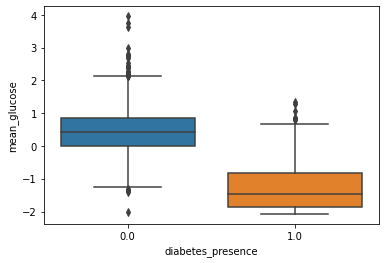

In [4]:
sns.boxplot(y = "mean_glucose", x = "diabetes_presence", data= train_data)

In [5]:
rule_1_columns = ["mean_glucose", "diabetes_presence"]
train_data[rule_1_columns].loc[(train_data["mean_glucose"] <= -0.75) & (train_data["mean_glucose"] > -0.76)].head(40)

,mean_glucose,diabetes_presence
73,-0.750975,1.0
142,-0.759431,1.0
368,-0.755320,1.0
841,-0.758975,0.0
2046,-0.752348,0.0
2200,-0.756691,1.0
2328,-0.752805,0.0
3634,-0.754406,0.0


In [6]:
rules_dict = {}

In [7]:
def calculate_accuracy(rule, key):
    return (rule[key]["TP"] + rule[key]["TN"]) / rule[key]["sum"]

def calculate_precision(rule, key):
    return rule[key]["TP"] / (rule[key]["TP"] + rule[key]["FP"])

def calculate_recall(rule, key):
    return rule[key]["TP"] / (rule[key]["TP"] + rule[key]["FN"])


def print_results(rule, key):
    print("Number of records: ", rule[key]["sum"])
    print("True positive: ", rule[key]["TP"])
    print("True negative: ", rule[key]["TN"])
    print("False positive: ", rule[key]["FP"])
    print("False negative: ", rule[key]["FN"])

    print("Accuracy: ", calculate_accuracy(rule, key))
    print("Precision: ", calculate_precision(rule, key))
    print("Recall: ", calculate_recall(rule, key))

In [8]:
# used attribute is mean_glucose
def rule_1(data, key):

    rules_dict[key] = {}
    rules_dict[key]["sum"] = data["diabetes_presence"].count()

    rules_dict[key]["TP"] = len(data.loc[(data["mean_glucose"] <= -0.75) & (data["diabetes_presence"] == 1.0), "diabetes_presence"])
    rules_dict[key]["TN"] = len(data.loc[(data["mean_glucose"] >  -0.75) & (data["diabetes_presence"] == 0.0), "diabetes_presence"])
    rules_dict[key]["FP"] = len(data.loc[(data["mean_glucose"] <= -0.75) & (data["diabetes_presence"] == 0.0), "diabetes_presence"])
    rules_dict[key]["FN"] = len(data.loc[(data["mean_glucose"] >  -0.75) & (data["diabetes_presence"] == 1.0), "diabetes_presence"])
    
    print_results(rules_dict, key)

In [9]:
rule_1(train_data, "train_1")

Number of records:  3924
True positive:  778
True negative:  2840
False positive:  80
False negative:  226
Accuracy:  0.9220183486238532
Precision:  0.9067599067599068
Recall:  0.7749003984063745


<AxesSubplot:xlabel='diabetes_presence', ylabel='kurtosis_glucose'>

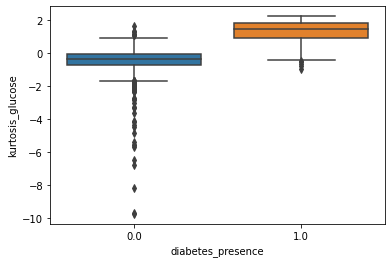

In [13]:
sns.boxplot(y = "kurtosis_glucose", x = "diabetes_presence", data= train_data)

In [22]:
rule_2_columns = ["kurtosis_glucose", "diabetes_presence"]
#train_data[rule_2_columns].loc[train_data["diabetes_presence"] == 0].head(20)
train_data[rule_2_columns].loc[(train_data["kurtosis_glucose"] >= 0.6) & (train_data["kurtosis_glucose"] < 0.65)].head(40)

,kurtosis_glucose,diabetes_presence
6,0.626568,1.0
675,0.635158,1.0
797,0.623671,1.0
1144,0.641077,0.0
1376,0.605885,0.0
1580,0.630058,1.0
1665,0.609249,0.0
1746,0.607142,0.0
1976,0.600465,1.0
2285,0.647630,1.0


In [24]:
# used attribute is kurtosis glucose
def rule_2(data, key):

    rules_dict[key] = {}
    rules_dict[key]["sum"] = data["diabetes_presence"].count()

    rules_dict[key]["TP"] = len(data.loc[(data["kurtosis_glucose"] >  0.6) & (data["diabetes_presence"] == 1.0), "diabetes_presence"])
    rules_dict[key]["TN"] = len(data.loc[(data["kurtosis_glucose"] <= 0.6) & (data["diabetes_presence"] == 0.0), "diabetes_presence"])
    rules_dict[key]["FP"] = len(data.loc[(data["kurtosis_glucose"] >  0.6) & (data["diabetes_presence"] == 0.0), "diabetes_presence"])
    rules_dict[key]["FN"] = len(data.loc[(data["kurtosis_glucose"] <= 0.6) & (data["diabetes_presence"] == 1.0), "diabetes_presence"])

    print_results(rules_dict, key)

In [25]:
rule_2(train_data, "train_2")

Number of records:  3924
True positive:  840
True negative:  2898
False positive:  22
False negative:  164
Accuracy:  0.9525993883792049
Precision:  0.974477958236659
Recall:  0.8366533864541833
